    Link To The Live Project
[Here](https://crop-type-predictor.streamlit.app/)
    


#3MTT Tech For Good Hackathon
###ZARAU BELLO BAIDU

zeerabaidu@gmail.com

09033533209

FE/23/76720695

AI/ML

Usman abdullahi

FE/23/15845638

usmanabdullahe@gmail.com

08068971745

AI/ML

Salim Salisu Maiwada

Fe/23/65275328

Salimsalisumaiwada@gmail.com

08035853395

AI/ML

#CROP TYPE PREDICTOR

In [1]:
# All required libraries are imported here for you.
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
from sklearn.svm import SVC
import numpy as np


# Load the dataset


crops = pd.read_csv("https://raw.githubusercontent.com/zeerau/3mtt_hackathon/main/soil_measures.csv")
print(crops.head())
print(crops.info())
print(crops.describe())

    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB
None
                 N            P            K           ph
count  2200.000000  2200.000000  2200.000000  2200.000000
mean     50.551818    53.362727    48.149091     6.469480
std      36.917334    32.985883    50.647931     0.773938
min       0.000000     5.000000     5.000000     3.504752
25%      21.000000    28.000000    20.000000     5.971693
50%      37.000000    51.000000    32.0

In [2]:
# Check how many crops we have, i.e., multi-class target
crops.crop.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

<Axes: ylabel='crop'>

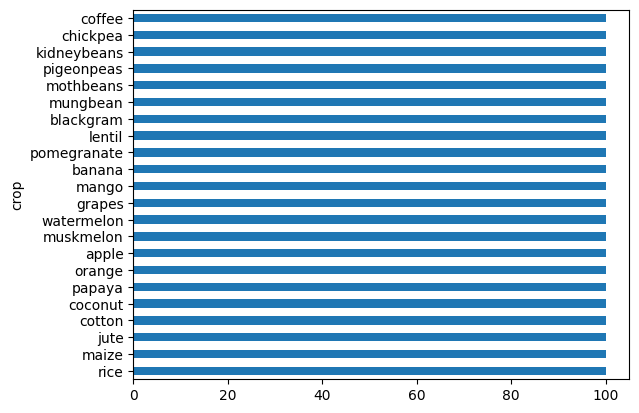

In [3]:
crops.crop.value_counts().plot.barh()

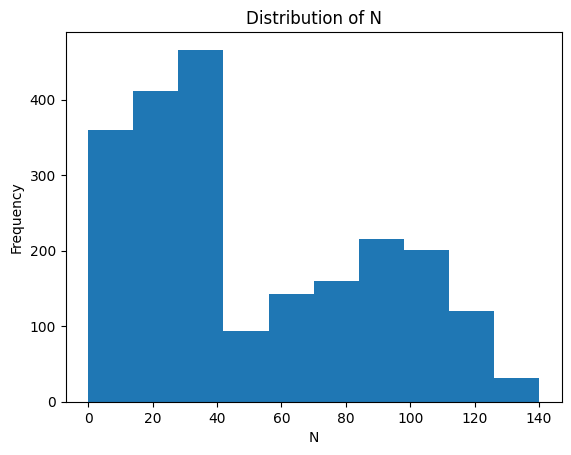

In [4]:
plt.hist(crops["N"])
plt.xlabel("N")
plt.ylabel("Frequency")
plt.title("Distribution of N")
plt.show()

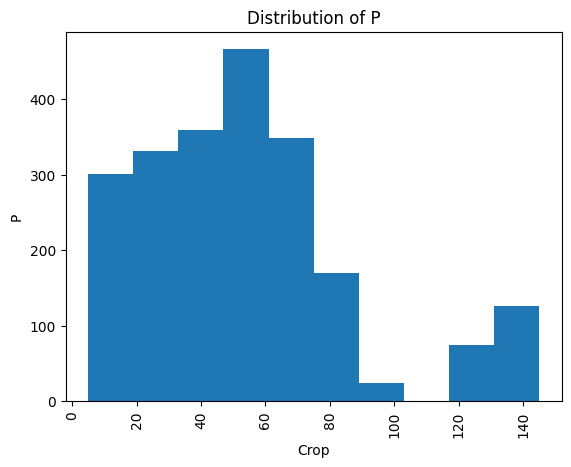

In [5]:
plt.hist(crops["P"])
plt.xlabel("Crop")
plt.ylabel("P")
plt.xticks(rotation=90)
plt.title("Distribution of P")
plt.show()

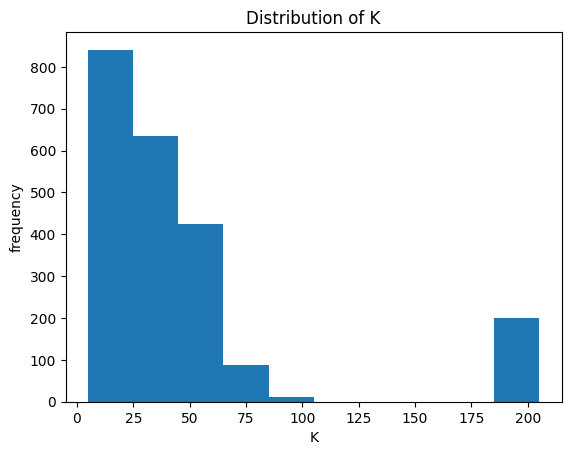

In [6]:
plt.hist(crops["K"])
plt.xlabel("K")
plt.ylabel("frequency")
plt.title("Distribution of K")
plt.show()

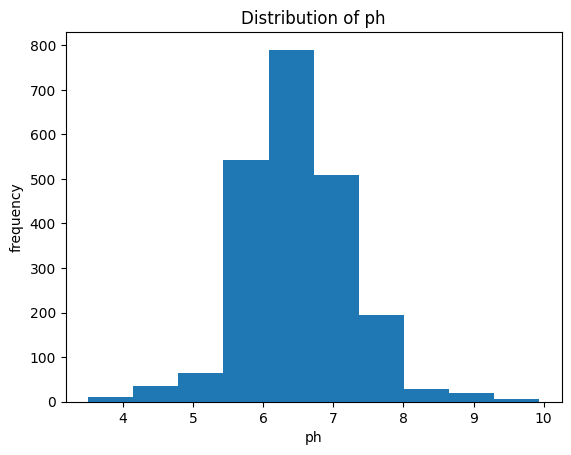

In [7]:
plt.hist(crops["ph"])
plt.xlabel("ph")
plt.ylabel("frequency")
plt.title("Distribution of ph")
plt.show()

In [8]:
import pandas as pd
import numpy as np

def impute_outliers_with_median(data, columns):
  """
  Imputes outliers in the specified column of a DataFrame with the median.

  Args:
    data: pandas DataFrame containing the data.
    column: str, the name of the column to impute.

  Returns:
    pandas DataFrame with outliers in the specified column replaced by the median.
  """

  for column in columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Calculate the median of non-outlier values
    median = data.loc[~data.index.isin(outliers.index), column].median()

    # Impute outliers with the median
    data.loc[outliers.index, column] = median

  return data

# Assuming 'crops' is your DataFrame and you want to impute 'N', 'P', 'K'
columns_to_impute = ['P', 'K']
crops = impute_outliers_with_median(crops, columns_to_impute)

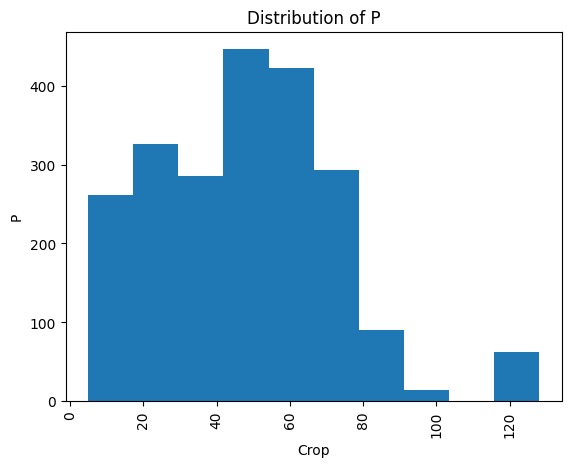

In [9]:
plt.hist(crops["P"])
plt.xlabel("Crop")
plt.ylabel("P")
plt.xticks(rotation=90)
plt.title("Distribution of P")
plt.show()

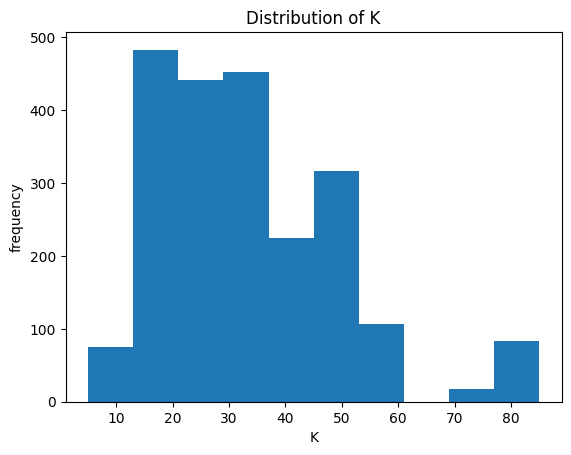

In [10]:
plt.hist(crops["K"])
plt.xlabel("K")
plt.ylabel("frequency")
plt.title("Distribution of K")
plt.show()

In [11]:
# Check for missing values
crops.isna().sum()

,0
N,0
P,0
K,0
ph,0
crop,0


In [12]:
# Split into feature and target sets
X = crops.drop(columns="crop")
y = crops["crop"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)



In [13]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)




In [14]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model using the scaled training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy with Random Forest:", accuracy_rf)

# You can also print the classification report for more detailed evaluation
print(classification_report(y_test, y_pred_rf))

Accuracy with Random Forest: 0.8045454545454546
              precision    recall  f1-score   support

       apple       0.69      0.48      0.56        23
      banana       1.00      1.00      1.00        21
   blackgram       0.89      0.85      0.87        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.83      0.89      0.86        27
      coffee       0.84      0.94      0.89        17
      cotton       0.89      1.00      0.94        17
      grapes       0.43      0.64      0.51        14
        jute       0.56      0.61      0.58        23
 kidneybeans       0.80      1.00      0.89        20
      lentil       0.44      0.73      0.55        11
       maize       1.00      0.95      0.98        21
       mango       0.82      0.74      0.78        19
   mothbeans       0.95      0.75      0.84        24
    mungbean       0.78      0.95      0.86        19
   muskmelon       0.62      0.59      0.61        17
      orange       1.00      1.00

In [15]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
print(f'nutrient: {X_test_scaled_df.iloc[50][X_test_scaled_df.iloc[50]!=0].keys()}')
print(f'crop: {y_test.iloc[50]}')

print(f'nutrient: {X_test_scaled_df.iloc[60][X_test_scaled_df.iloc[60]!=0].keys()}')
print(f'crop: {y_test.iloc[60]}')

print(f'nutrient: {X_test_scaled_df.iloc[70][X_test_scaled_df.iloc[70]!=0].keys()}')
print(f'crop: {y_test.iloc[70]}')

nutrient: Index(['N', 'P', 'K', 'ph'], dtype='object')
crop: blackgram
nutrient: Index(['N', 'P', 'K', 'ph'], dtype='object')
crop: watermelon
nutrient: Index(['N', 'P', 'K', 'ph'], dtype='object')
crop: muskmelon


In [17]:
import pickle


filename = 'crop_prediction_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf_classifier, file)

In [18]:
with open('scaler.pkl', 'wb') as file:
       pickle.dump(scaler, file)